<a href="https://colab.research.google.com/github/marcelopaludetto/aulao-datascience/blob/main/aulaoDataScience_atualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extraindo informações do Edutech

In [29]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [30]:
filenames = ['https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%201.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%202.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%203.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%204.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%205.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%206.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%207.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%208.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%209.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2010.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2011.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2012.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2013.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2014.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2015.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2016.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2017.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2018.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2019.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2020.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2021.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2022.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2023.csv',
             'https://raw.githubusercontent.com/marcelopaludetto/aulao-datascience/main/SEED%20-%20Semana%2024.csv']


dados = [pd.read_csv(f) for f in filenames] 

In [31]:
dados[0].columns

Index(['data', 'data de último acesso', 'id', 'email', 'cargo', 'teamId',
       'turmaTrilha', 'atividadesFeitas', 'atividadesCorretas',
       'atividadesGerais'],
      dtype='object')

In [32]:
for f in range(24):
 dados[f] = dados[f].drop(columns=['cargo','email','teamId'])

In [33]:
dados[0].head(10)

,data,data de último acesso,id,turmaTrilha,atividadesFeitas,atividadesCorretas,atividadesGerais
0,2021-04-19,2021-05-05,589685,12400133,159,126,813.0
1,2021-04-19,2021-05-03,602784,21406831,129,122,542.0
2,2021-04-19,2021-04-26,608608,24400531,104,97,393.0
3,2021-04-19,2021-05-03,492948,"1656722,22400112",83,83,269.0
4,2021-04-19,2021-05-04,519898,21900101,82,81,309.0
5,2021-04-19,2021-04-25,487571,24400232,73,73,320.0
6,2021-04-19,2021-05-05,594650,12407331,83,70,476.0
7,2021-04-19,2021-05-06,566760,11400411,80,68,431.0
8,2021-04-19,2021-04-20,601746,21405731,70,67,364.0
9,2021-04-19,2021-05-04,596252,12408231,67,66,266.0


In [34]:
index = dados[0].turmaTrilha.str.find(',') > 0

In [35]:
index

0        False
1        False
2        False
3         True
4        False
         ...  
67482    False
67483    False
67484    False
67485    False
67486    False
Name: turmaTrilha, Length: 67487, dtype: bool

In [36]:
index.value_counts()

False    67022
True       465
Name: turmaTrilha, dtype: int64

In [37]:
 dados[0].turmaTrilha[3].split(',')[1]

'22400112'

In [38]:
for j in range(24):
  index = dados[j].turmaTrilha.str.find(',') > 0
  for i in range(index.count()):
    if (index[i] == True):
      dados[j].turmaTrilha[i] = dados[j].turmaTrilha[i].split(',')[1]

In [39]:
dados[9].head(100)

,data,data de último acesso,id,turmaTrilha,atividadesFeitas,atividadesCorretas,atividadesGerais
0,2021-06-21,2021-06-24,597991,21400432,169,161,683.0
1,2021-06-21,2021-06-24,586482,11402231,149,143,579.0
2,2021-06-21,2021-06-22,735653,1670439,144,140,542.0
3,2021-06-21,2021-06-22,774855,11401611,155,131,606.0
4,2021-06-21,2021-06-24,568594,11400911,122,117,466.0
...,...,...,...,...,...,...,...
95,2021-06-21,2021-06-24,596958,12409431,30,29,93.0
96,2021-06-21,2021-06-24,566420,25900201,31,29,177.0
97,2021-06-21,2021-06-25,576570,11413511,29,29,92.0
98,2021-06-21,2021-06-23,573088,11408611,33,29,108.0


In [42]:
renomear = {'data' : 'data',
            'data de último acesso' : 'data_ultimo_acesso',
            'id' : 'id',
            'turmaTrilha':'turmaTrilha',
            'atividadesFeitas':'atividadesFeitas',
            'atividadesCorretas':'atividadesCorretas',
            'atividadesGerais': 'atividadesGerais'}

In [48]:
for f in range(24):
  dados[f] = dados[f].rename(columns=renomear)

dados[23].head()

,data,data_ultimo_acesso,id,turmaTrilha,atividadesFeitas,atividadesCorretas,atividadesGerais
0,2021-09-27,2021-09-28,738222,1664785,161,159,610.0
1,2021-09-27,2021-09-28,733995,1664785,121,104,448.0
2,2021-09-27,2021-09-27,737988,1677432,89,89,313.0
3,2021-09-27,2021-09-28,590268,12409431,84,84,309.0
4,2021-09-27,2021-09-28,729955,1662777,84,84,340.0


# Número de estudantes no Edutech

In [49]:
EstudantesEdutech = [];
for f in range(24):
  print('Na {} semana, estudantes = {}'.format(f+1,dados[f].data.count()))
  EstudantesEdutech.append(dados[f].data.count())

Na 1 semana, estudantes = 67487
Na 2 semana, estudantes = 67487
Na 3 semana, estudantes = 67487
Na 4 semana, estudantes = 67487
Na 5 semana, estudantes = 67488
Na 6 semana, estudantes = 67745
Na 7 semana, estudantes = 70776
Na 8 semana, estudantes = 70842
Na 9 semana, estudantes = 47923
Na 10 semana, estudantes = 48010
Na 11 semana, estudantes = 48008
Na 12 semana, estudantes = 48511
Na 13 semana, estudantes = 48512
Na 14 semana, estudantes = 48719
Na 15 semana, estudantes = 46581
Na 16 semana, estudantes = 46704
Na 17 semana, estudantes = 46668
Na 18 semana, estudantes = 34791
Na 19 semana, estudantes = 38232
Na 20 semana, estudantes = 40717
Na 21 semana, estudantes = 41896
Na 22 semana, estudantes = 41902
Na 23 semana, estudantes = 42268
Na 24 semana, estudantes = 42268


In [50]:
EstudantesEdutech

[67487,
 67487,
 67487,
 67487,
 67488,
 67745,
 70776,
 70842,
 47923,
 48010,
 48008,
 48511,
 48512,
 48719,
 46581,
 46704,
 46668,
 34791,
 38232,
 40717,
 41896,
 41902,
 42268,
 42268]

In [51]:
print('Na semana {} foram incluidos {} estudantes no programa Edutech'.format(7,dados[6].data.count() - dados[5].data.count()))

Na semana 7 foram incluidos 3031 estudantes no programa Edutech


In [52]:
print('Na 9 semana, foram excluídos {} estudantes do programa Edutech'.format(dados[7].data.count() - dados[8].data.count()))

Na 9 semana, foram excluídos 22919 estudantes do programa Edutech


# Criar dias da semana no último acesso

In [53]:
for i in range(24):
  dia_da_semana = [];
  for f in range(dados[i].data_ultimo_acesso.count()):
      temp = pd.Timestamp(dados[i].data_ultimo_acesso[f])
      dia_da_semana.append(temp.day_name())
  dados[i]['dia_da_semana'] = dia_da_semana
  

In [54]:
dados[1].head()

,data,data_ultimo_acesso,id,turmaTrilha,atividadesFeitas,atividadesCorretas,atividadesGerais,dia_da_semana
0,2021-04-26,2021-05-05,589712,12400431,165,139,699.0,Wednesday
1,2021-04-26,2021-05-06,575825,11413411,146,124,726.0,Thursday
2,2021-04-26,2021-04-28,585090,25400111,131,116,402.0,Wednesday
3,2021-04-26,2021-04-26,605128,22402231,106,105,394.0,Monday
4,2021-04-26,2021-05-05,583378,21400911,124,96,464.0,Wednesday


## Traduzir os dias da semana

In [55]:
dados[1].dia_da_semana.unique()

array(['Wednesday', 'Thursday', 'Monday', 'Sunday', 'Saturday', 'Tuesday',
       'Friday'], dtype=object)

In [56]:
renomear_dia = {
    'Wednesday' : 'Quarta',
    'Thursday' : 'Quinta',
    'Monday' : 'Segunda',
    'Sunday' : 'Domingo',
    'Saturday' : 'Sabado',
    'Tuesday' : 'Terca',
    'Friday' : 'Sexta'
}


In [57]:
for i in range(24):
  dados[i].dia_da_semana = dados[i].dia_da_semana.map(renomear_dia)


dados[1].head()

,data,data_ultimo_acesso,id,turmaTrilha,atividadesFeitas,atividadesCorretas,atividadesGerais,dia_da_semana
0,2021-04-26,2021-05-05,589712,12400431,165,139,699.0,Quarta
1,2021-04-26,2021-05-06,575825,11413411,146,124,726.0,Quinta
2,2021-04-26,2021-04-28,585090,25400111,131,116,402.0,Quarta
3,2021-04-26,2021-04-26,605128,22402231,106,105,394.0,Segunda
4,2021-04-26,2021-05-05,583378,21400911,124,96,464.0,Quarta


In [58]:
dados[2].dia_da_semana.unique()

array(['Sexta', 'Domingo', 'Quinta', 'Terca', 'Segunda', 'Sabado',
       'Quarta'], dtype=object)

## Coletando o número de alunos ativos

In [59]:
for i in range(24):
  print('Na {} semana, o número de estudantes ativos no Edutech é de {}'.format(i+1,dados[i][dados[i]['atividadesGerais'].notnull()].data.count()))



Na 1 semana, o número de estudantes ativos no Edutech é de 6358
Na 2 semana, o número de estudantes ativos no Edutech é de 6619
Na 3 semana, o número de estudantes ativos no Edutech é de 6664
Na 4 semana, o número de estudantes ativos no Edutech é de 6696
Na 5 semana, o número de estudantes ativos no Edutech é de 6485
Na 6 semana, o número de estudantes ativos no Edutech é de 6879
Na 7 semana, o número de estudantes ativos no Edutech é de 5592
Na 8 semana, o número de estudantes ativos no Edutech é de 6439
Na 9 semana, o número de estudantes ativos no Edutech é de 6538
Na 10 semana, o número de estudantes ativos no Edutech é de 6352
Na 11 semana, o número de estudantes ativos no Edutech é de 5395
Na 12 semana, o número de estudantes ativos no Edutech é de 4297
Na 13 semana, o número de estudantes ativos no Edutech é de 1401
Na 14 semana, o número de estudantes ativos no Edutech é de 3676
Na 15 semana, o número de estudantes ativos no Edutech é de 5321
Na 16 semana, o número de estudant

In [60]:
for i in range(24):
  print('Na semana {} tivemos {} % de estudantes ativos.'.format(i+1,(dados[i][dados[i]['atividadesGerais'].notnull()].data.count()/dados[i].data.count()*100).round(2)))


Na semana 1 tivemos 9.42 % de estudantes ativos.
Na semana 2 tivemos 9.81 % de estudantes ativos.
Na semana 3 tivemos 9.87 % de estudantes ativos.
Na semana 4 tivemos 9.92 % de estudantes ativos.
Na semana 5 tivemos 9.61 % de estudantes ativos.
Na semana 6 tivemos 10.15 % de estudantes ativos.
Na semana 7 tivemos 7.9 % de estudantes ativos.
Na semana 8 tivemos 9.09 % de estudantes ativos.
Na semana 9 tivemos 13.64 % de estudantes ativos.
Na semana 10 tivemos 13.23 % de estudantes ativos.
Na semana 11 tivemos 11.24 % de estudantes ativos.
Na semana 12 tivemos 8.86 % de estudantes ativos.
Na semana 13 tivemos 2.89 % de estudantes ativos.
Na semana 14 tivemos 7.55 % de estudantes ativos.
Na semana 15 tivemos 11.42 % de estudantes ativos.
Na semana 16 tivemos 11.77 % de estudantes ativos.
Na semana 17 tivemos 11.69 % de estudantes ativos.
Na semana 18 tivemos 15.59 % de estudantes ativos.
Na semana 19 tivemos 14.88 % de estudantes ativos.
Na semana 20 tivemos 15.36 % de estudantes ativos.


In [61]:
len('11400513')

8

In [62]:
dados[23]['turmaTrilha'][40]

'11407711'

In [63]:
dados[23]['turmaTrilha'][40][0:2]

'11'

In [64]:
for i in range(24):
  dados[i].turmaTrilha.replace('\xa0','')

crtl + shift + L

In [67]:
for j in range(24):
  dados[j]['Trilha'] = 0
  for i in range(dados[j].data.count()):
    if len(dados[j]['turmaTrilha'][i]) == 7:
      dados[j]['Trilha'][i] = 'ETI'
    if len(dados[j]['turmaTrilha'][i]) == 8:
      if dados[j]['turmaTrilha'][i][0:2] == '11':
        dados[j]['Trilha'][i] = 'Games1'
      if dados[j]['turmaTrilha'][i][0:2] == '12':
        dados[j]['Trilha'][i] = 'Games2'     
      if dados[j]['turmaTrilha'][i][0:2] == '21':
        dados[j]['Trilha'][i] = 'FrontEnd'
      if dados[j]['turmaTrilha'][i][0:2] == '22':
        dados[j]['Trilha'][i] = 'Mobile'    
      if dados[j]['turmaTrilha'][i][0:2] == '23':
        dados[j]['Trilha'][i] = 'DataScience' 
      if dados[j]['turmaTrilha'][i][0:2] == '24':
        dados[j]['Trilha'][i] = 'Java'     
      if dados[j]['turmaTrilha'][i][0:2] == '25':
        dados[j]['Trilha'][i] = 'Python'        

In [70]:
dados[23].Trilha.value_counts()

ETI            19375
Games1          7772
Games2          5855
FrontEnd        3467
Mobile          1823
Python          1539
Java            1375
DataScience     1046
0                 16
Name: Trilha, dtype: int64

# Analisando o número de atividades feitas por semana

In [82]:
alunosAtivosDaSemana = [];
for i in range(24):
  alunosAtivosDaSemana.append(dados[i].query("atividadesGerais > 0"))


alunosAtivosDaSemana[1]

,data,data_ultimo_acesso,id,turmaTrilha,atividadesFeitas,atividadesCorretas,atividadesGerais,dia_da_semana,Trilha
0,2021-04-26,2021-05-05,589712,12400431,165,139,699.0,Quarta,Games2
1,2021-04-26,2021-05-06,575825,11413411,146,124,726.0,Quinta,Games1
2,2021-04-26,2021-04-28,585090,25400111,131,116,402.0,Quarta,Python
3,2021-04-26,2021-04-26,605128,22402231,106,105,394.0,Segunda,Mobile
4,2021-04-26,2021-05-05,583378,21400911,124,96,464.0,Quarta,FrontEnd
...,...,...,...,...,...,...,...,...,...
67447,2021-04-26,2021-05-06,594222,12405931,0,0,1.0,Quinta,Games2
67464,2021-04-26,2021-05-05,727188,1688369,0,0,1.0,Quarta,ETI
67466,2021-04-26,2021-05-04,573934,11410011,0,0,1.0,Terca,Games1
67471,2021-04-26,2021-05-05,584094,22400511,0,0,1.0,Quarta,Mobile


In [80]:
for i in range(24):
  print('Na semana {} foram realidas {} atividades'.format(i+1,sum(alunosAtivosDaSemana[i].atividadesFeitas)))

Na semana 1 foram realidas 28573 atividades
Na semana 2 foram realidas 30411 atividades
Na semana 3 foram realidas 32140 atividades
Na semana 4 foram realidas 36710 atividades
Na semana 5 foram realidas 32696 atividades
Na semana 6 foram realidas 35833 atividades
Na semana 7 foram realidas 27989 atividades
Na semana 8 foram realidas 32763 atividades
Na semana 9 foram realidas 31950 atividades
Na semana 10 foram realidas 30279 atividades
Na semana 11 foram realidas 25463 atividades
Na semana 12 foram realidas 21533 atividades
Na semana 13 foram realidas 7809 atividades
Na semana 14 foram realidas 18009 atividades
Na semana 15 foram realidas 27738 atividades
Na semana 16 foram realidas 29051 atividades
Na semana 17 foram realidas 29636 atividades
Na semana 18 foram realidas 33382 atividades
Na semana 19 foram realidas 36146 atividades
Na semana 20 foram realidas 42321 atividades
Na semana 21 foram realidas 37718 atividades
Na semana 22 foram realidas 52312 atividades
Na semana 23 foram r

In [119]:
grafico = [];
for i in range(24):
  grafico.append(alunosAtivosDaSemana[i].atividadesFeitas.count())

max(grafico)

7349

In [121]:
(alunosAtivosDaSemana[22].query("Trilha == 'ETI'"))

,data,data_ultimo_acesso,id,turmaTrilha,atividadesFeitas,atividadesCorretas,atividadesGerais,dia_da_semana,Trilha
0,2021-09-20,2021-09-24,768708,1668638,326,318,1281.0,Sexta,ETI
1,2021-09-20,2021-09-24,729931,1668638,251,237,966.0,Sexta,ETI
3,2021-09-20,2021-09-24,730201,1678302,225,223,860.0,Sexta,ETI
5,2021-09-20,2021-09-24,737490,1668638,231,213,906.0,Sexta,ETI
6,2021-09-20,2021-09-24,736213,1678302,217,207,822.0,Sexta,ETI
...,...,...,...,...,...,...,...,...,...
42162,2021-09-20,2021-09-24,726527,1662319,0,0,9.0,Sexta,ETI
42170,2021-09-20,2021-09-23,736854,1697840,0,0,3.0,Quinta,ETI
42202,2021-09-20,2021-09-23,724036,1656714,0,0,3.0,Quinta,ETI
42204,2021-09-20,2021-09-23,729954,1687227,0,0,3.0,Quinta,ETI


# Gráficos

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

Gráfico01 - Número de estudantes inscritos no Edutech por semana

In [122]:
dados[1].columns

Index(['data', 'data_ultimo_acesso', 'id', 'turmaTrilha', 'atividadesFeitas',
       'atividadesCorretas', 'atividadesGerais', 'dia_da_semana', 'Trilha'],
      dtype='object')

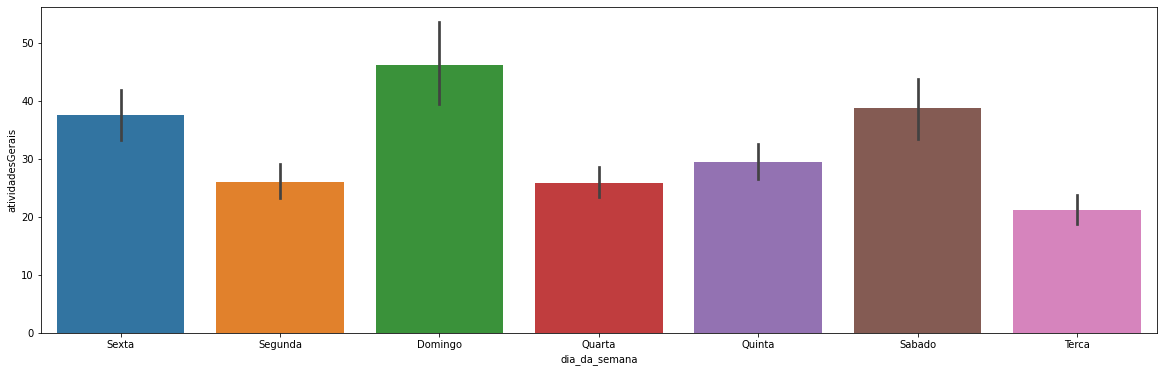

In [132]:
fig = sns.barplot(x='dia_da_semana',y='atividadesGerais',data=alunosAtivosDaSemana[22])
fig.figure.set_size_inches(20,6)

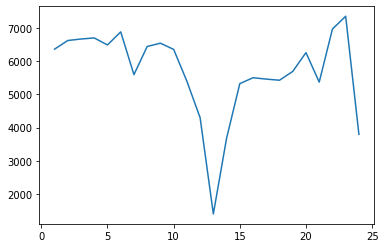

In [109]:
plt.plot(list(range(1,25)),grafico)

Gráfico 1.1 - 

Gráfico 02 - Número de estudantes ativos
<br>

Gráfico 03 - Qual dia que os alunos mais estudam?
<br> **Linha (Temporal)**

Gráfico 04 - Número de atividades feitas por trilha (semana - semana)
<br> ETI, Games1, Games2, Front, Mobile, Data, Java e Python
<br>  **Gráfico de Barras**

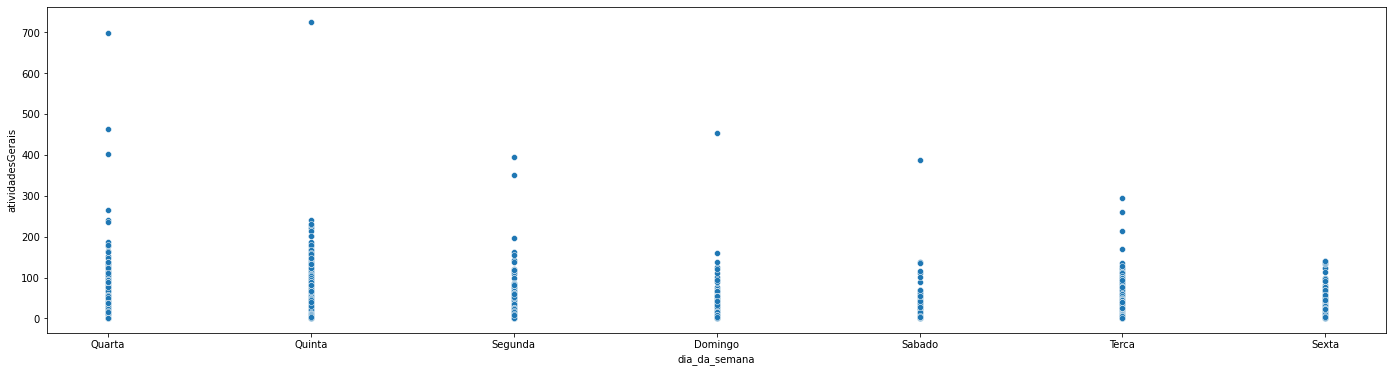

In [134]:
plt = sns.scatterplot(x='dia_da_semana',y='atividadesGerais', data=alunosAtivosDaSemana[1])
plt.figure.set_size_inches(24,6)

# Organizando as datas no eixo X